PERSONNAL PROJECT: KOUMAKANG PARFAIT ABOYNA

STEP 1: Load Dataset
Library Importation for data cleaning, preprocessing and visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset of churn

In [2]:
data = pd.read_csv('Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


STEP 2: Dataset Overview. 
We inspect the structure of the dataset, including columns, data types, and missing values.

In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


STEP 3: Drop Non-Informative Features
Some features do not contribute to churn prediction and are removed.

In [5]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

STEP 4: Churn Distribution
We analyze how many customers churned compared to those who stayed.

In [6]:
data['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

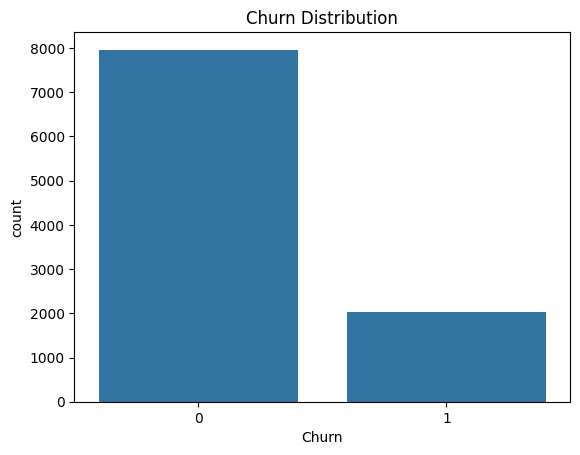

In [7]:
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

STEP 5: Statistical Summary
Descriptive statistics help identify ranges, spreads, and outliers.

In [8]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


STEP 6: Univariate Analysis
Age Distribution

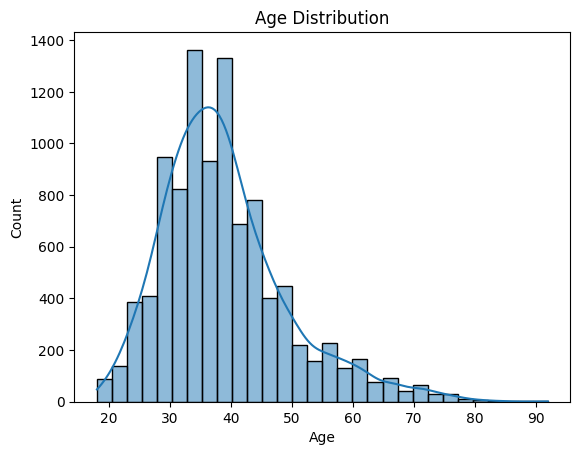

In [9]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Credit Score Distribution

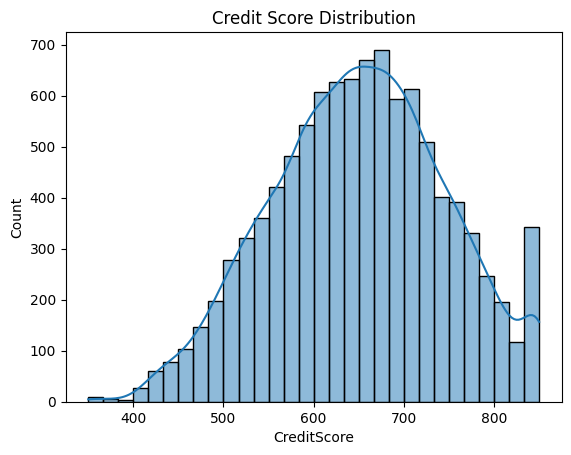

In [10]:
sns.histplot(data['CreditScore'], bins=30, kde=True)
plt.title("Credit Score Distribution")
plt.show()

STEP 7: Bivariate Analysis
Age vs Churn

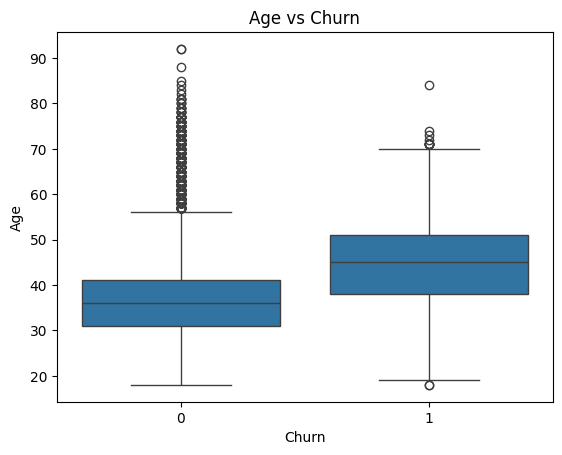

In [11]:
sns.boxplot(x='Churn', y='Age', data=data)
plt.title("Age vs Churn")
plt.show()

Balance vs Churn

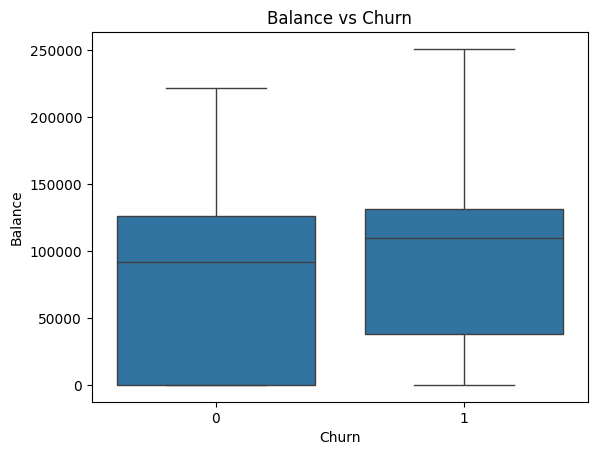

In [12]:
sns.boxplot(x='Churn', y='Balance', data=data)
plt.title("Balance vs Churn")
plt.show()

Credit vs Churn

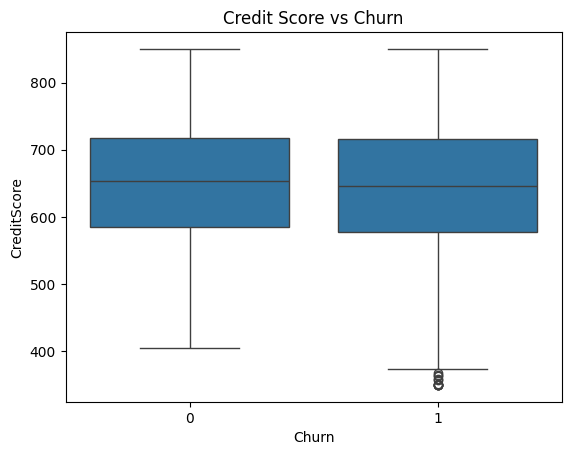

In [13]:
sns.boxplot(x='Churn', y='CreditScore', data=data)
plt.title("Credit Score vs Churn")
plt.show()

STEP 8: Categorical Feature Analysis
Geography vs Churn

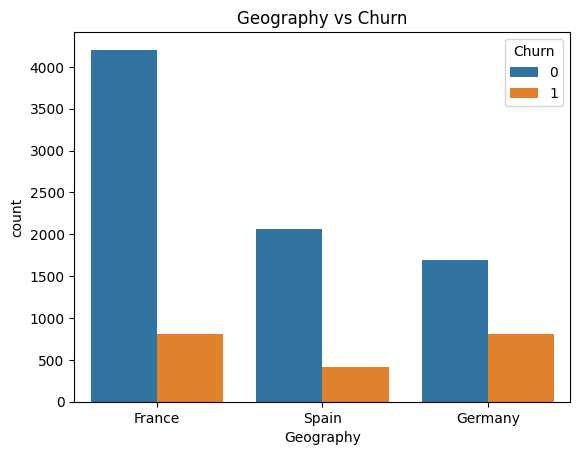

In [14]:
sns.countplot(x='Geography', hue='Churn', data=data)
plt.title("Geography vs Churn")
plt.show()

Gender vs Churn

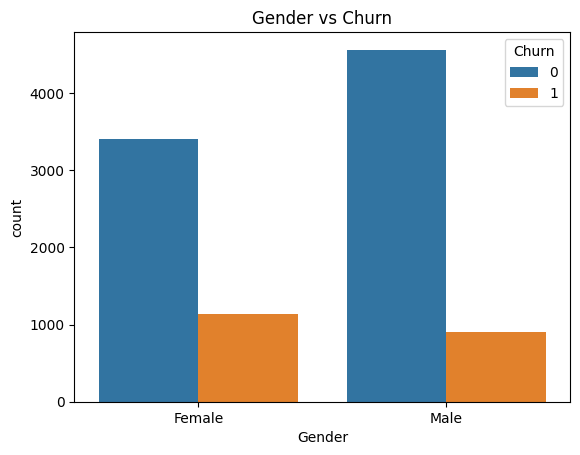

In [15]:
sns.countplot(x='Gender', hue='Churn', data=data)
plt.title("Gender vs Churn")
plt.show()

STEP 9: Correlation Heatmap
We examine correlations between numerical features.

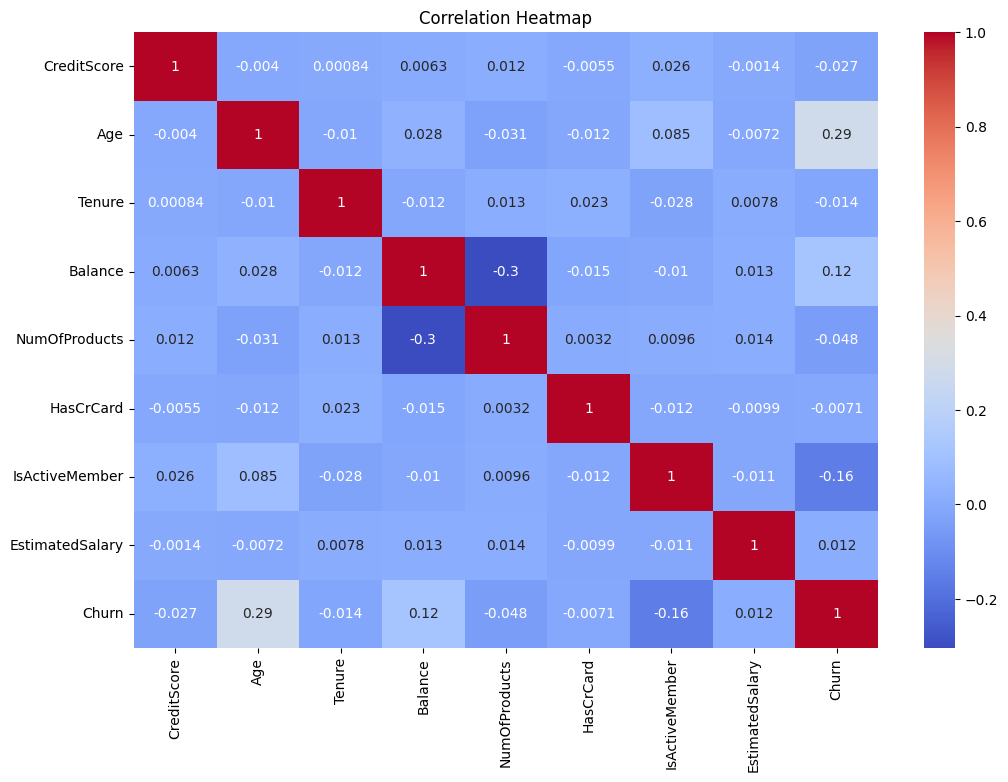

In [16]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

STEP 10: Encode Categorical Variables
Machine learning models require numerical input.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


STEP 11: Create New Features
We create new features to better capture customer behavior.

In [19]:
data['BalanceSalaryRatio'] = data['Balance'] / (data['EstimatedSalary'] + 1)
data['TenureByAge'] = data['Tenure'] / (data['Age'] + 1)
data['CreditScoreGivenAge'] = data['CreditScore'] / (data['Age'] + 1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          10000 non-null  int64  
 1   Geography            10000 non-null  int64  
 2   Gender               10000 non-null  int64  
 3   Age                  10000 non-null  int64  
 4   Tenure               10000 non-null  int64  
 5   Balance              10000 non-null  float64
 6   NumOfProducts        10000 non-null  int64  
 7   HasCrCard            10000 non-null  int64  
 8   IsActiveMember       10000 non-null  int64  
 9   EstimatedSalary      10000 non-null  float64
 10  Churn                10000 non-null  int64  
 11  BalanceSalaryRatio   10000 non-null  float64
 12  TenureByAge          10000 non-null  float64
 13  CreditScoreGivenAge  10000 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 1.1 MB


Visualise heapmap with all the data now

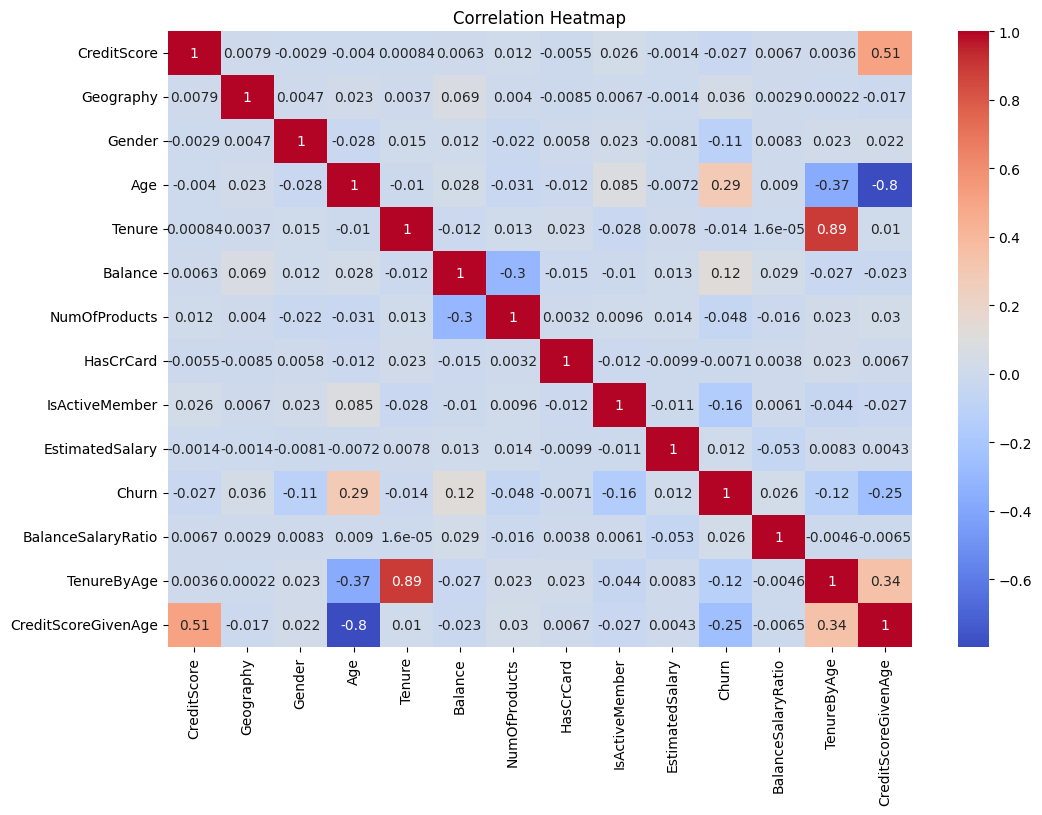

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

STEP 12: Separate Features and Target

In [22]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [23]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,0,0,42,2,0.00,1,1,1,101348.88,0.000000,0.046512,14.395349
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0.744670,0.023810,14.476190
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1.401362,0.186047,11.674419
3,699,0,0,39,1,0.00,2,0,0,93826.63,0.000000,0.025000,17.475000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,1.587035,0.045455,19.318182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0.000000,0.125000,19.275000
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0.564102,0.277778,14.333333
9997,709,0,0,36,7,0.00,1,0,1,42085.58,0.000000,0.189189,19.162162
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,0.808222,0.069767,17.953488


STEP 13: Scale Features
Scaling ensures all features contribute equally.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[-0.32622142, -0.90188624, -1.09598752, ..., -0.03788227,
        -1.01244086, -0.58160037],
       [-0.44003595,  1.51506738, -1.09598752, ..., -0.03043935,
        -1.27512311, -0.56577538],
       [-1.53679418, -0.90188624, -1.09598752, ..., -0.02387576,
         0.60209391, -1.11423032],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -0.03788227,
         0.6384573 ,  0.35151711],
       [ 1.25683526,  0.30659057,  0.91241915, ..., -0.02980416,
        -0.74335174,  0.11491573],
       [ 1.46377078, -0.90188624, -1.09598752, ..., -0.00382343,
         0.04535778,  1.94654741]], shape=(10000, 13))

STEP 14: Split the Dataset

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_train, y_train)

model_2 = LogisticRegression(max_iter=1000)
model_2.fit(X_train_s, y_train_s)

/home/kouma/Desktop/Personal/AI_BOOTCAMP_NOW/Project/.venv_ml/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

STEP 16: Predictions and Evaluation

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Evaluate none scaled model

In [29]:
y_pred = model_1.predict(X_test)
accuracy_score(y_test, y_pred)

0.824

In [30]:
confusion_matrix(y_test, y_pred)

array([[1571,   36],
       [ 316,   77]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1607
           1       0.68      0.20      0.30       393

    accuracy                           0.82      2000
   macro avg       0.76      0.59      0.60      2000
weighted avg       0.80      0.82      0.78      2000



Evaluate Scaled model

In [32]:
y_pred_s = model_2.predict(X_test_s)
accuracy_score(y_test_s, y_pred_s)

0.822

In [33]:
confusion_matrix(y_test_s, y_pred_s)

array([[1568,   39],
       [ 317,   76]])

In [34]:
print(classification_report(y_test_s, y_pred_s))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1607
           1       0.66      0.19      0.30       393

    accuracy                           0.82      2000
   macro avg       0.75      0.58      0.60      2000
weighted avg       0.80      0.82      0.78      2000



TRAINING MODEL WITH CORRELATED FEATURES

First we will use the original data without scalling and new features. From this data we will select only numerical features(Numeric_data variable declared previously up)

In [35]:
corr_with_churn = numeric_data.corr()['Churn'].sort_values(ascending=False)
corr_with_churn

Churn              1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Churn, dtype: float64

Secondly we will look at the data with the normalise labels and the new features

In [36]:
corr_with_churn_s = data.corr()['Churn'].sort_values(ascending=False)
corr_with_churn_s

Churn                  1.000000
Age                    0.285323
Balance                0.118533
Geography              0.035943
BalanceSalaryRatio     0.025963
EstimatedSalary        0.012097
HasCrCard             -0.007138
Tenure                -0.014001
CreditScore           -0.027094
NumOfProducts         -0.047820
Gender                -0.106512
TenureByAge           -0.119651
IsActiveMember        -0.156128
CreditScoreGivenAge   -0.253008
Name: Churn, dtype: float64

Since we have now all the correlations we will choose the stronghes ones with a threshold of 0.1

In [37]:
important_features_1 = corr_with_churn[abs(corr_with_churn) >= 0.1].index.tolist()
important_features_1

['Churn', 'Age', 'Balance', 'IsActiveMember']

In [38]:
important_features_2 = corr_with_churn_s[abs(corr_with_churn_s) >= 0.1].index.tolist()
important_features_2

['Churn',
 'Age',
 'Balance',
 'Gender',
 'TenureByAge',
 'IsActiveMember',
 'CreditScoreGivenAge']

Since we already know the important features in both cases of our needs we can reduice our dataset including exclusively important features before spliting

In [39]:
#First reduice dataset based on important features from unscaled data
data_reduced_1 = data[important_features_1]
data_reduced_1.head()

,Churn,Age,Balance,IsActiveMember
0,1,42,0.00,1
1,0,41,83807.86,1
2,1,42,159660.80,0
3,0,39,0.00,0
4,0,43,125510.82,1


In [40]:
#Second reduce dataset based on important features from unscaled data
data_reduced_2 = data[important_features_2]
data_reduced_2.head()

,Churn,Age,Balance,Gender,TenureByAge,IsActiveMember,CreditScoreGivenAge
0,1,42,0.00,0,0.046512,1,14.395349
1,0,41,83807.86,0,0.023810,1,14.476190
2,1,42,159660.80,0,0.186047,0,11.674419
3,0,39,0.00,0,0.025000,0,17.475000
4,0,43,125510.82,0,0.045455,1,19.318182


Now lets separate our data in Features and label

In [41]:
X_1 = data_reduced_1.drop('Churn', axis=1)
y_1 = data_reduced_1['Churn']

In [42]:
X_2 = data_reduced_2.drop('Churn', axis=1)
y_2 = data_reduced_2['Churn']

Let's use those none scaled data to train our model

To do that we have to separate our data into training and testing test(80-20)

In [43]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_1, y_1, test_size=0.2, random_state=42)

In [44]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42)

Now we will train our model using these two dataset

Lets train with the first dataset

In [57]:
from sklearn.linear_model import LogisticRegression

model_1_reduced = LogisticRegression(max_iter=1000)
model_1_reduced.fit(X1_train, y1_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

After training we will evaluate to see the performance on this one

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y1_pred = model_1_reduced.predict(X1_test)
accuracy_score(y1_test, y1_pred)

0.81

In [59]:
confusion_matrix(y1_test, y1_pred)

array([[1563,   44],
       [ 336,   57]])

In [60]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.56      0.15      0.23       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.77      0.81      0.76      2000



Let's Train with the second dataset

In [61]:
model_2_reduced = LogisticRegression(max_iter=1000)
model_2_reduced.fit(X2_train, y2_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

After training we will evaluate the performance of the model with the second dataset

In [62]:
y2_pred = model_2_reduced.predict(X2_test)
accuracy_score(y2_test, y2_pred)

0.8135

In [63]:
confusion_matrix(y2_test, y2_pred)

array([[1557,   50],
       [ 323,   70]])

In [64]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.58      0.18      0.27       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000



Now let's use those reduiced dataset but the scaled version to see if we can have improvement

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X_1)
X2_scaled = scaler.fit_transform(X_2)

Now we will split the scaled data for the trainning

In [66]:
X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(
    X1_scaled, y_1, test_size=0.2, random_state=42)

In [67]:
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(
    X2_scaled, y_2, test_size=0.2, random_state=42)

In [68]:
model_scaled_1 = LogisticRegression()
model_scaled_1.fit(X_train_s1, y_train_s1)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [69]:
y1_scaled_pred = model_scaled_1.predict(X_test_s1)
accuracy_score(y_test_s1, y1_scaled_pred)

0.81

In [70]:
confusion_matrix(y_test_s1, y1_scaled_pred)

array([[1563,   44],
       [ 336,   57]])

In [71]:
print(classification_report(y_test_s1, y1_scaled_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.56      0.15      0.23       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.77      0.81      0.76      2000



In [ ]:
model_scaled_2 = LogisticRegression()
model_scaled_2.fit(X_train_s2, y_train_s2)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [77]:
y_2_scaled_pred = model_scaled_2.predict(X_test_s2)
accuracy_score(y_test_s2, y_2_scaled_pred)

0.8135

In [74]:
confusion_matrix(y_test_s2, y_2_scaled_pred)

array([[1557,   50],
       [ 323,   70]])

In [75]:
print(classification_report(y_test_s2, y_2_scaled_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.58      0.18      0.27       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000

